In [55]:
import pandas as pd
df=pd.read_csv('TelcoChurn.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [56]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [57]:
df.drop(['customerID','TotalCharges','PaperlessBilling'],axis=1,inplace=True)

In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaymentMethod     7043 non-null   object 
 16  MonthlyCharges    7043 non-null   float64


In [59]:
import numpy as np
df.sort_values('tenure',inplace=True,ignore_index=True)
Q1=np.percentile(df['tenure'], 25)
Q2=np.percentile(df['tenure'], 50)
Q3=np.percentile(df['tenure'], 75)
IQR=Q3-Q1
out_low=Q1-(1.5*IQR)
out_hi=Q3+(1.5*IQR)
Upper=np.percentile(df['tenure'], 95)
Lower=np.percentile(df['tenure'], 5)
for i in range(7043):
    if df.loc[i,'tenure']>out_hi:
        df.at[i,'tenure']=Upper
    elif df.loc[i,'tenure']<out_low:
        df.at[i,'tenure']=Lower


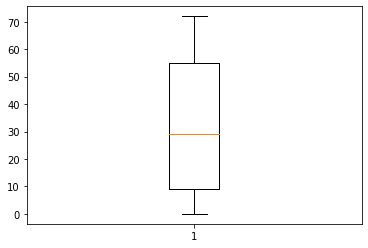

In [60]:
import matplotlib.pyplot as plt
plt.boxplot(df['tenure'])
plt.show()


In [61]:
df.sort_values('MonthlyCharges',inplace=True,ignore_index=True)
Q1=np.percentile(df['MonthlyCharges'], 25)
Q2=np.percentile(df['MonthlyCharges'], 50)
Q3=np.percentile(df['MonthlyCharges'], 75)
IQR=Q3-Q1
out_low=Q1-(1.5*IQR)
out_hi=Q3+(1.5*IQR)
Upper=np.percentile(df['MonthlyCharges'], 95)
Lower=np.percentile(df['MonthlyCharges'], 5)
for i in range(7043):
    if df.loc[i,'MonthlyCharges']>out_hi:
        df.at[i,'MonthlyCharges']=Upper
    elif df.loc[i,'MonthlyCharges']<out_low:
        df.at[i,'MonthlyCharges']=Lower

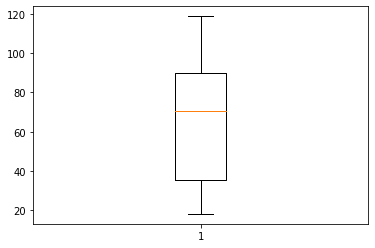

In [62]:
plt.boxplot(df['MonthlyCharges'])
plt.show()

In [63]:
x=df.copy()


In [64]:
x.drop(['Churn'],axis=1,inplace=True)
x.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaymentMethod,MonthlyCharges
0,Male,0,No,No,28,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Credit card (automatic),18.25
1,Female,0,Yes,No,59,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,Bank transfer (automatic),18.40
2,Male,0,No,No,36,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,Credit card (automatic),18.55
3,Female,0,No,No,53,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,Mailed check,18.70
4,Female,0,Yes,Yes,25,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,Mailed check,18.70


In [65]:
y=df['Churn'].copy()

In [154]:
y.head()
y.describe()

count     7043
unique       2
top         No
freq      5174
Name: Churn, dtype: object

In [67]:
X_OHE = pd.get_dummies(x, columns = ['gender','SeniorCitizen', 'Partner', 'Dependents','PhoneService','InternetService','OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','Contract','PaymentMethod','MultipleLines','StreamingMovies'])
X_OHE.head()

,tenure,MonthlyCharges,gender_Female,gender_Male,SeniorCitizen_0,SeniorCitizen_1,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,...,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,MultipleLines_No,MultipleLines_No phone service,MultipleLines_Yes,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes
0,28,18.25,0,1,1,0,1,0,1,0,...,0,1,0,0,1,0,0,0,1,0
1,59,18.40,1,0,1,0,0,1,1,0,...,1,0,0,0,1,0,0,0,1,0
2,36,18.55,0,1,1,0,1,0,1,0,...,0,1,0,0,1,0,0,0,1,0
3,53,18.70,1,0,1,0,1,0,1,0,...,0,0,0,1,1,0,0,0,1,0
4,25,18.70,1,0,1,0,0,1,0,1,...,0,0,0,1,1,0,0,0,1,0


In [68]:
Y_OHE= pd.get_dummies(y, columns = ['churn'])
Y_OHE.head()

,No,Yes
0,1,0
1,1,0
2,1,0
3,1,0
4,1,0


In [118]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_OHE,y, test_size=0.2, random_state=42)

In [149]:
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier
# clf = RandomForestClassifier(n_estimators=80, max_features="auto",random_state=0)
# clf.fit(X_train, y_train)
# y_pred = clf.predict(X_test)
# accuracy_score(y_test, y_pred)
# clf = AdaBoostClassifier(n_estimators=8)
# clf.fit(X_train, y_train)
# y_pred = clf.predict(X_test)
# accuracy_score(y_test, y_pred)
clf = GradientBoostingClassifier(learning_rate=0.1,n_estimators=85,max_depth=3,min_samples_split=2)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
y_train_pred=clf.predict(X_train)
print(accuracy_score(y_train, y_train_pred))
print(accuracy_score(y_test, y_pred))

0.8205537806176784
0.8005677785663591


In [150]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
y_train_pred=clf.predict(X_train)
print(accuracy_score(y_train, y_train_pred))
print(accuracy_score(y_test, y_pred))

0.8020944266950657
0.8055358410220014


C:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
